In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as Data 
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor

In [2]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
  "dog cat animal", "banana apple cat dog like", "dog fish milk like",
  "dog cat animal like", "jack like apple", "apple like", "jack like banana",
  "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
sentence_list = " ".join(sentences).split() # ['jack', 'like', 'dog']
vocab = list(set(sentence_list))
word2idx = {w:i for i, w in enumerate(vocab)}
vocab_size = len(vocab)

In [3]:
window_size = 2
batch_size = 8
embedding_dim = 2

In [4]:
skip_grams = []
for idx in range(window_size, len(sentence_list) - window_size):
    center = word2idx[sentence_list[idx]]
    context_idx = list(range(idx - window_size, idx)) + list(range(idx+1, idx+window_size+1))
    context = [word2idx[sentence_list[i]] for i in context_idx]
    for w in context:
        skip_grams.append([center, w])
        
    

In [7]:
def make_data(skip_grams):
    input_data = []
    output_data = []
    for a ,b in skip_grams:
        input_data.append(np.eye(vocab_size)[a])
        output_data.append(b)
    return input_data, output_data


In [8]:
input_data, output_data = make_data(skip_grams)
input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)
dataset = Data.TensorDataset(input_data, output_data)
loader = Data.DataLoader(dataset, batch_size, True)

In [19]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec,self).__init__()
        self.W = nn.Parameter(torch.randn(vocab_size, 64).type(dtype))
        # 也可以直接用linear函数
        self.linear = nn.Linear(64,vocab_size,bias=False)
    def forward(self, x):
        # input: [batch_size, vocab_size]
        hidden = torch.mm(x, self.W) #[batch_size, 64]
        out = self.linear(hidden)
        return out
model = Word2Vec().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimer = optim.Adam(model.parameters(), lr=1e-3)

In [20]:
for epoch in range(2000):
  for i, (batch_x, batch_y) in enumerate(loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    pred = model(batch_x)
    loss = loss_fn(pred, batch_y)

    if (epoch + 1) % 1000 == 0:
      print(epoch + 1, i, loss.item())
    
    
    loss.backward()
    optimer.step()
    optimer.zero_grad()

1000 0 2.081061601638794
1000 1 1.9176640510559082
1000 2 1.6850529909133911
1000 3 1.734728455543518
1000 4 1.8296414613723755
1000 5 1.690212607383728
1000 6 1.8864331245422363
1000 7 1.7912237644195557
1000 8 1.9996849298477173
1000 9 1.8558003902435303
1000 10 2.0582027435302734
1000 11 1.6117732524871826
1000 12 2.1955080032348633
1000 13 1.8311870098114014
1000 14 1.5604597330093384
1000 15 1.8693006038665771
1000 16 1.5873620510101318
1000 17 1.9931983947753906
1000 18 1.5055879354476929
1000 19 1.769067406654358
1000 20 2.002713918685913
2000 0 2.340306043624878
2000 1 1.2512246370315552
2000 2 1.935264229774475
2000 3 1.9464173316955566
2000 4 1.369445562362671
2000 5 1.8721437454223633
2000 6 2.151810884475708
2000 7 1.942744493484497
2000 8 1.8113658428192139
2000 9 1.5092792510986328
2000 10 1.8344688415527344
2000 11 1.8459709882736206
2000 12 2.052037477493286
2000 13 1.6483793258666992
2000 14 2.041489362716675
2000 15 2.2484686374664307
2000 16 1.7400661706924438
2000 1

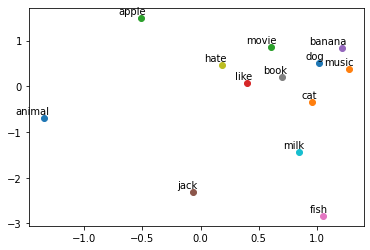

In [21]:
import matplotlib.pyplot as plt
for i, label in enumerate(vocab):
  W, WT = model.parameters()
  x,y = float(W[i][0]), float(W[i][1])
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [30]:
# 引入 word2vec
from gensim.models import word2vec

# 引入日志配置
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 引入数据集
raw_sentences = ["the quick brown fox jumps over the lazy dogs","yoyoyo you go home now to sleep"]

# 切分词汇
sentences= [s.encode('utf-8').split() for s in raw_sentences]

# 构建模型
model = word2vec.Word2Vec(sentences, min_count=0)#，Word2Vec在训练时会忽略词频小于该属性值的词



2023-04-25 16:49:53,082 : INFO : collecting all words and their counts
2023-04-25 16:49:53,083 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-04-25 16:49:53,083 : INFO : collected 15 word types from a corpus of 16 raw words and 2 sentences
2023-04-25 16:49:53,083 : INFO : Creating a fresh vocabulary
2023-04-25 16:49:53,084 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=0 retains 15 unique words (100.0%% of original 15, drops 0)', 'datetime': '2023-04-25T16:49:53.084113', 'gensim': '4.0.1', 'python': '3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2023-04-25 16:49:53,085 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=0 leaves 16 word corpus (100.0%% of original 16, drops 0)', 'datetime': '2023-04-25T16:49:53.085115', 'gensim': '4.0.1', 'python': '3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Window

In [22]:
sentences

[[b'the',
  b'quick',
  b'brown',
  b'fox',
  b'jumps',
  b'over',
  b'the',
  b'lazy',
  b'dogs'],
 [b'yoyoyo', b'you', b'go', b'home', b'now', b'to', b'sleep']]

In [28]:
# y1 = model.wv.similarity(b"dogs", b'you')
# print(y1)

In [29]:
# vector = model.wv['dogs'] # get numpy vector of a word
# sims = model.wv.most_similar('computer', topn=10) # get other similar
# vector